In [1]:
import pandas as pd
import numpy as np
#pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier

In [3]:
# Let's use chunks now
summaries = []

for chunk in pd.read_csv("../data/SC-clean-trimmed.csv", 
                         usecols=["id", "driver_gender", "driver_race", "officer_race", "stop_outcome"], 
                         dtype={"id" : "str", "driver_gender" : "category", "driver_race" : "category",
                                "officer_race" : "category", "stop_outcome" : "category"},
                         chunksize=100000):
    chunk["year"] = [int(val.split("-")[1]) for val in chunk["id"]]
    summary = chunk.groupby(["driver_race", "driver_gender", "officer_race", "year", "stop_outcome"]).count().fillna(0)
    summaries.append(summary)

In [5]:
summaries[1]

id
driver_race driver_gender officer_race year stop_outcome         
Black       F             Amerindian   2005 Arrest            0.0
                                            Citation          4.0
                                            Warning           0.0
                          Asian        2005 Arrest            1.0
                                            Citation         18.0
                                            Warning           7.0
                          Black        2005 Arrest           17.0
                                            Citation       1132.0
                                            Warning         486.0
                          Hispanic     2005 Arrest            0.0
                                            Citation         44.0
                                            Warning           3.0
                          Multi-Race   2005 Arrest            0.0
                                            Citation         11.0
                                            Warning          20.0
                          Other        2005 Arrest            0.0
                                            Citation          4.0
                                            Warning           5.0
                          White        2005 Arrest          109.0
                                            Citation       6903.0
                                            Warning        2831.0
            M             Amerindian   2005 Arrest            3.0
                                            Citation         20.0
                                            Warning           3.0
                          Asian        2005 Arrest            2.0
                                            Citation         24.0
                                            Warning          18.0
                          Black        2005 Arrest          103.0
                                            Citation       1835.0
                                            Warning         493.0
...                                                           ...
White       F             Multi-Race   2005 Arrest            0.0
                                            Citation         29.0
                                            Warning          16.0
                          Other        2005 Arrest            0.0
                                            Citation         19.0
                                            Warning          26.0
                          White        2005 Arrest          149.0
                                            Citation      12533.0
                                            Warning        5848.0
            M             Amerindian   2005 Arrest            0.0
                                            Citation         27.0
                                            Warning           3.0
                          Asian        2005 Arrest            3.0
                                            Citation         89.0
                                            Warning          47.0
                          Black        2005 Arrest           68.0
                                            Citation       3294.0
                                            Warning         812.0
                          Hispanic     2005 Arrest            1.0
                                            Citation        174.0
                                            Warning          18.0
                          Multi-Race   2005 Arrest            3.0
                                            Citation         63.0
                                            Warning          31.0
                          Other        2005 Arrest            0.0
                                            Citation         31.0
                                            Warning          35.0
                          White        2005 Arrest          818.0
                                     

In [6]:
# Now combine the summaries
total_summary = summaries[0]
for summary in summaries[1:]:
    total_summary = pd.concat([total_summary.reset_index(), summary.reset_index()])
    total_summary = total_summary.groupby(["driver_race", "driver_gender", "officer_race", "year", "stop_outcome"]).sum()
total_summary


id
driver_race driver_gender officer_race year stop_outcome           
Black       F             Amerindian   2005 Arrest              0.0
                                            Citation           26.0
                                            Felony Arrest       0.0
                                            Warning            17.0
                                       2006 Arrest              3.0
                                            Citation          142.0
                                            Felony Arrest       0.0
                                            Warning           109.0
                                       2007 Arrest              3.0
                                            Citation          260.0
                                            Felony Arrest       0.0
                                            Warning           102.0
                                       2008 Arrest              4.0
                                            Citation          236.0
                                            Felony Arrest       0.0
                                            Warning           103.0
                                       2009 Arrest              0.0
                                            Citation          275.0
                                            Felony Arrest       0.0
                                            Warning           155.0
                                       2010 Arrest              0.0
                                            Citation          178.0
                                            Felony Arrest       0.0
                                            Warning           251.0
                                       2011 Arrest              0.0
                                            Citation          198.0
                                            Felony Arrest       0.0
                                            Warning           298.0
                                       2012 Arrest              0.0
                                            Citation          209.0
...                                                             ...
White       M             White        2009 Felony Arrest     257.0
                                            Warning        115037.0
                                       2010 Arrest           7332.0
                                            Citation       177281.0
                                            Felony Arrest     247.0
                                            Warning        118199.0
                                       2011 Arrest           7008.0
                                            Citation       175791.0
                                            Felony Arrest     221.0
                                            Warning        118852.0
                                       2012 Arrest           6509.0
                                            Citation       175365.0
                                            Felony Arrest     224.0
                                            Warning        118003.0
                                       2013 Arrest           5759.0
                                            Citation       167120.0
                                            Felony Arrest     209.0
                                            Warning        107469.0
                                       2014 Arrest           5306.0
                                            Citation       153912.0
                                            Felony Arrest     170.0
                                            Warning         89367.0
                                       2015 Arrest           4578.0
                                            Citation       133516.0
                                            Felony Arrest     145.0
                                            Warning         74958.0
                                       2016 Arrest   

In [7]:
total_summary.to_csv("../output/summary.csv")

In [28]:
race_table = pd.pivot_table(data, index=["driver_race", "driver_gender", "officer_race", "year"], columns=["stop_outcome"],
                            aggfunc="count")
race_table.fillna(0)

MultiIndex(levels=[['Black', 'Hispanic', 'Other', 'White'], ['F', 'M'], ['Amerindian', 'Asian', 'Black', 'Hispanic', 'Multi-Race', 'Other', 'White'], [2005]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
           names=['driver_race', 'driver_gender', 'officer_race', 'year'])

In [8]:
race_table.to_csv("../output/race_table.csv")

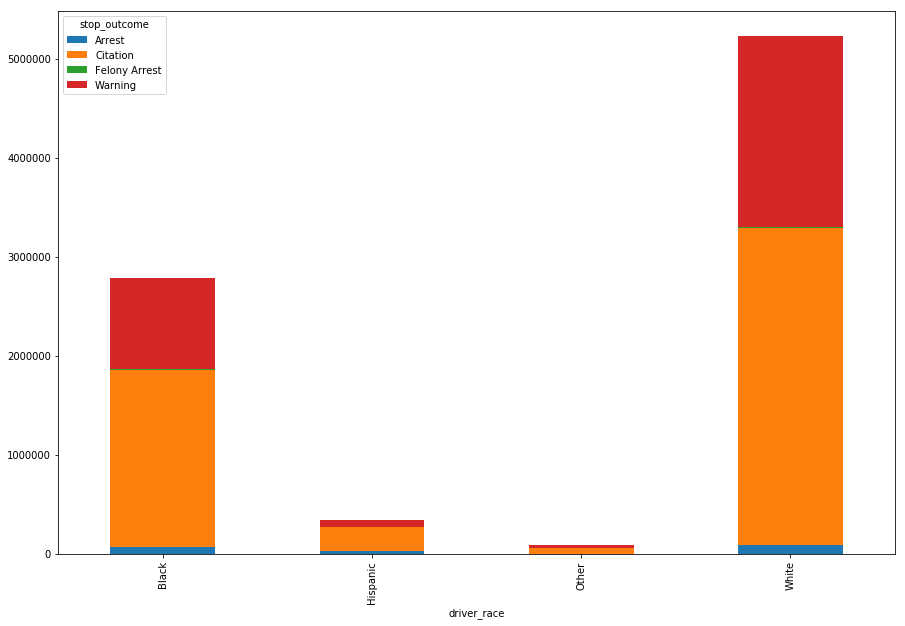

In [6]:
race_table.plot(kind="bar", stacked=True, figsize=(15, 10))

In [15]:
data["officer_race"].value_counts()

White         7432168
Black          827462
Hispanic        96725
Amerindian      40382
Asian           22747
Multi-Race      12359
Other            4785
Name: officer_race, dtype: int64